## Задание 1

Каждая строчка датасета - пост из твиттера, два класса: катастрофа и нет

1) Необходимо очистить данные от лишних символов и стоп-слов. (готово)

2) Построить информативные графики, демонстрирующие специфику датасета.(готово)

3) Применить 3 способа токенизации (по словам, bpe, berttokenizer)(готово)

4) Сделать одну векторизацию и 2 варианта эмбеддингов. Один из
алгоритмов эмбеддингов предобученная модель (huggingface).(Готово)

5) Визуализировать близость получившихся эмбеддингов, цветами
окрасить разные классы. Можно применить РСА перед отрисовкой

6) Для каждой используемой технологии в комментариях около ячейки кодом написать своими словами принцип (идею) алгоритма. Описания похожие на текст от GPT приниматься не будут.


7) Выложить на github

# Подготовочка

In [ ]:
#! python3 -m venv .venv
#! source .venv/bin/activate


Установим пакеты

In [ ]:

! pip install pandas
! pip install nltk
! pip install seaborn
! pip install openpyxl
! pip install setuptools



Импортируем установленное

In [ ]:
import pandas as pd

import nltk
from nltk.corpus import stopwords

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


import string


import seaborn as sns

import re

Прочитаем датасет, чтобы примерно понять его структуру

In [ ]:
df = pd.read_csv('socialmedia_relevant_cols.csv', encoding='unicode-escape')
df

,text,choose_one,class_label
0,Just happened a terrible car crash,Relevant,1
1,Our Deeds are the Reason of this #earthquake M...,Relevant,1
2,"Heard about #earthquake is different cities, s...",Relevant,1
3,"there is a forest fire at spot pond, geese are...",Relevant,1
4,Forest fire near La Ronge Sask. Canada,Relevant,1
...,...,...,...
10871,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,Relevant,1
10872,Police investigating after an e-bike collided ...,Relevant,1
10873,The Latest: More Homes Razed by Northern Calif...,Relevant,1
10874,MEG issues Hazardous Weather Outlook (HWO) htt...,Relevant,1


# Часть 1

очистим датасет от знаков препинания и ссылок

In [ ]:
df['text'] = df['text'].apply(lambda x:  re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', " ", x))


for i in string.punctuation:
    df['text'] = df['text'].str.replace(i, ' ').replace('  ', ' ')

df['text'] = df['text'].apply(lambda x: x.lower())




df

,text,choose_one,class_label
0,just happened a terrible car crash,Relevant,1
1,our deeds are the reason of this earthquake m...,Relevant,1
2,heard about earthquake is different cities s...,Relevant,1
3,there is a forest fire at spot pond geese are...,Relevant,1
4,forest fire near la ronge sask canada,Relevant,1
...,...,...,...
10871,m1 94 01 04 utc 5km s of volcano hawaii,Relevant,1
10872,police investigating after an e bike collided ...,Relevant,1
10873,the latest more homes razed by northern calif...,Relevant,1
10874,meg issues hazardous weather outlook hwo,Relevant,1


Теперь от стоп слов + токенизация

In [ ]:
#Функция для удаления стоп слов
def stop_words_deleting(x, word_list):
    return [w for w in x if not w in word_list]

In [ ]:

nltk.download('stopwords')
nltk.download('punkt')

stop_words = set(stopwords.words('english'))
df['text'] = df['text'].astype(str)
df['text'] = df['text'].apply(lambda x: word_tokenize(x))

df['text'] = df['text'].apply(lambda x: stop_words_deleting(x, stop_words))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Промежуточный результат

In [ ]:
save_for_future = df # потом пригодится
df

,text,choose_one,class_label
0,"[happened, terrible, car, crash]",Relevant,1
1,"[deeds, reason, earthquake, may, allah, forgiv...",Relevant,1
2,"[heard, earthquake, different, cities, stay, s...",Relevant,1
3,"[forest, fire, spot, pond, geese, fleeing, acr...",Relevant,1
4,"[forest, fire, near, la, ronge, sask, canada]",Relevant,1
...,...,...,...
10871,"[m1, 94, 01, 04, utc, 5km, volcano, hawaii]",Relevant,1
10872,"[police, investigating, e, bike, collided, car...",Relevant,1
10873,"[latest, homes, razed, northern, california, w...",Relevant,1
10874,"[meg, issues, hazardous, weather, outlook, hwo]",Relevant,1


???

# Часть 2
Порисуем:)

Узнаем, сколько у нас релевантных данных

In [ ]:
df[df['choose_one']=='Relevant']

,text,choose_one,class_label
0,"[happened, terrible, car, crash]",Relevant,1
1,"[deeds, reason, earthquake, may, allah, forgiv...",Relevant,1
2,"[heard, earthquake, different, cities, stay, s...",Relevant,1
3,"[forest, fire, spot, pond, geese, fleeing, acr...",Relevant,1
4,"[forest, fire, near, la, ronge, sask, canada]",Relevant,1
...,...,...,...
10871,"[m1, 94, 01, 04, utc, 5km, volcano, hawaii]",Relevant,1
10872,"[police, investigating, e, bike, collided, car...",Relevant,1
10873,"[latest, homes, razed, northern, california, w...",Relevant,1
10874,"[meg, issues, hazardous, weather, outlook, hwo]",Relevant,1


Посмотрим на графики chose_one и class_label, сделаем предположение по приблизительному кол-ву данных, что choose_one эквивалентно class_label

<Axes: xlabel='choose_one', ylabel='count'>

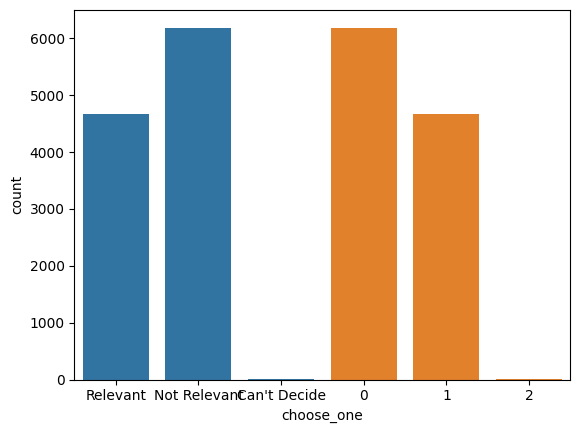

In [ ]:
sns.countplot(data=df, x='choose_one')
sns.countplot(data=df, x='class_label')


Проверим эту теорию

In [ ]:
df[df['choose_one'] == 'Not Relevant'][df['class_label'] == 1]

<ipython-input-15-512db9d528f8>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['choose_one'] == 'Not Relevant'][df['class_label'] == 1]


,text,choose_one,class_label


Пустота

In [ ]:
df[df['choose_one'] == 'Relevant'][df['class_label'] == 0]

<ipython-input-16-5e659ec9297e>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['choose_one'] == 'Relevant'][df['class_label'] == 0]


,text,choose_one,class_label


Пустота => предположение верно, столбцы эквивалентны.

Давайте накинем различных(умных и не очень) фичей  и поиграем в аналитиков:)

Например длину сообщений по символам(исходя из предположения, что во время катастроф люди будут писать менее длинные сообщения)

In [ ]:
df['length_of_msg'] = df['text'].apply(lambda x: len(''.join(x)))
df

,text,choose_one,class_label,length_of_msg
0,"[happened, terrible, car, crash]",Relevant,1,24
1,"[deeds, reason, earthquake, may, allah, forgiv...",Relevant,1,38
2,"[heard, earthquake, different, cities, stay, s...",Relevant,1,46
3,"[forest, fire, spot, pond, geese, fleeing, acr...",Relevant,1,46
4,"[forest, fire, near, la, ronge, sask, canada]",Relevant,1,31
...,...,...,...,...
10871,"[m1, 94, 01, 04, utc, 5km, volcano, hawaii]",Relevant,1,27
10872,"[police, investigating, e, bike, collided, car...",Relevant,1,100
10873,"[latest, homes, razed, northern, california, w...",Relevant,1,49
10874,"[meg, issues, hazardous, weather, outlook, hwo]",Relevant,1,35


А также, по украденному с kaggle(https://www.kaggle.com/datasets/prajwalkanade/sentiment-analysis-word-lists-dataset) списку негативных слов на английском введем фичу, отражающую их кол-во в конкретном объекте

Но для начала выполним лемматизацию, чтобы считать вхождения слов корректно

In [ ]:
nltk.download('wordnet')
def lemmatize_tokens(tokens, lemmatizer):
    for i in range(len(tokens)):
        tokens[i] = lemmatizer.lemmatize(tokens[i])
    return tokens
lemmatizer = WordNetLemmatizer()
df['text'] = df['text'].apply(lambda x: lemmatize_tokens(x, lemmatizer))
df

[nltk_data] Downloading package wordnet to /root/nltk_data...


,text,choose_one,class_label,length_of_msg
0,"[happened, terrible, car, crash]",Relevant,1,24
1,"[deed, reason, earthquake, may, allah, forgive...",Relevant,1,38
2,"[heard, earthquake, different, city, stay, saf...",Relevant,1,46
3,"[forest, fire, spot, pond, goose, fleeing, acr...",Relevant,1,46
4,"[forest, fire, near, la, ronge, sask, canada]",Relevant,1,31
...,...,...,...,...
10871,"[m1, 94, 01, 04, utc, 5km, volcano, hawaii]",Relevant,1,27
10872,"[police, investigating, e, bike, collided, car...",Relevant,1,100
10873,"[latest, home, razed, northern, california, wi...",Relevant,1,49
10874,"[meg, issue, hazardous, weather, outlook, hwo]",Relevant,1,35


Посчитаем вхождения плохих и хороших слов в посты

In [ ]:
words = pd.read_excel('PaN_words.xlsx')
neg = list(words['Negative Sense Word List'])
pos  = list(words['Positive Sense Word List'])
df['negative_counter'] = df['text'].apply(lambda x: [i in neg for i in x].count(True))
df['positive_counter'] = df['text'].apply(lambda x: [i in pos for i in x].count(True))

Что же у нас за ужас получился?

In [ ]:
df[df['negative_counter'] != 0]

,text,choose_one,class_label,length_of_msg,negative_counter,positive_counter
0,"[happened, terrible, car, crash]",Relevant,1,24,2,0
3,"[forest, fire, spot, pond, goose, fleeing, acr...",Relevant,1,46,1,2
7,"[got, sent, photo, ruby, alaska, smoke, wildfi...",Relevant,1,47,1,1
9,"[apocalypse, lighting, spokane, wildfire]",Relevant,1,34,1,0
10,"[flood, disaster, heavy, rain, cause, flash, f...",Relevant,1,75,1,2
...,...,...,...,...,...,...
10869,"[two, giant, crane, holding, bridge, collapse,...",Relevant,1,46,1,2
10870,"[aria, ahrary, thetawniest, control, wild, fir...",Relevant,1,77,2,4
10872,"[police, investigating, e, bike, collided, car...",Relevant,1,100,3,3
10874,"[meg, issue, hazardous, weather, outlook, hwo]",Relevant,1,35,2,0


Интересненько
а что для позитивного?

In [ ]:
df[df['positive_counter'] != 0]

,text,choose_one,class_label,length_of_msg,negative_counter,positive_counter
1,"[deed, reason, earthquake, may, allah, forgive...",Relevant,1,38,0,2
2,"[heard, earthquake, different, city, stay, saf...",Relevant,1,46,0,2
3,"[forest, fire, spot, pond, goose, fleeing, acr...",Relevant,1,46,1,2
4,"[forest, fire, near, la, ronge, sask, canada]",Relevant,1,31,0,1
5,"[resident, asked, shelter, place, notified, of...",Relevant,1,78,0,2
...,...,...,...,...,...,...
10867,"[stormchase, violent, record, breaking, ef, 5,...",Relevant,1,65,2,1
10869,"[two, giant, crane, holding, bridge, collapse,...",Relevant,1,46,1,2
10870,"[aria, ahrary, thetawniest, control, wild, fir...",Relevant,1,77,2,4
10872,"[police, investigating, e, bike, collided, car...",Relevant,1,100,3,3


In [ ]:
df

,text,choose_one,class_label,length_of_msg,negative_counter,positive_counter
0,"[happened, terrible, car, crash]",Relevant,1,24,2,0
1,"[deed, reason, earthquake, may, allah, forgive...",Relevant,1,38,0,2
2,"[heard, earthquake, different, city, stay, saf...",Relevant,1,46,0,2
3,"[forest, fire, spot, pond, goose, fleeing, acr...",Relevant,1,46,1,2
4,"[forest, fire, near, la, ronge, sask, canada]",Relevant,1,31,0,1
...,...,...,...,...,...,...
10871,"[m1, 94, 01, 04, utc, 5km, volcano, hawaii]",Relevant,1,27,0,0
10872,"[police, investigating, e, bike, collided, car...",Relevant,1,100,3,3
10873,"[latest, home, razed, northern, california, wi...",Relevant,1,49,0,1
10874,"[meg, issue, hazardous, weather, outlook, hwo]",Relevant,1,35,2,0


То же есть что-то интересное. Давайте посмотрим хитмапу для отображения корреляции по всем этим фичам и проанализируем ее


<Axes: >

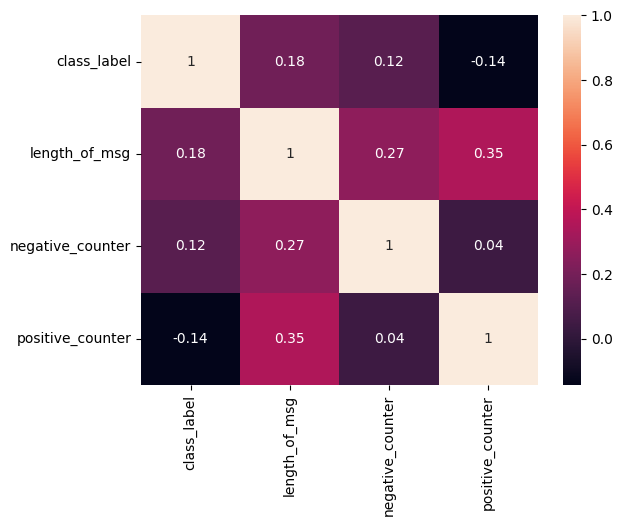

In [ ]:
sns.heatmap(df.drop(columns=['text', 'choose_one']).corr(), annot = True)

Из этого можно только лишь сделать вывод, что определение класса чуууточку зависит от позитив и негатив каунтера(тк зависимость от негативных слов положительна, а от позитивных отрицательна) => такая фича допустима
Длина же сообщения никак не влияет на класс, возможно потому, что люди пишут быстро и много в любых ситуациях. Кто знает, быть может, если бы они не сидели в твитере и не смотрели в телефон, их продолжительность жизни увеличилась бы....

Обнаружим, что у нас есть классы формата Can't Decide

In [ ]:
df[df['class_label'] ==2]

,text,choose_one,class_label,length_of_msg,negative_counter,positive_counter
279,"[ambulance, right, outside, work]",Can't Decide,2,25,0,2
1628,"[misfitrarity, misfit, got, bombed]",Can't Decide,2,27,1,0
1763,"[rockbottomradfm, one, challenge, tough, enoug...",Can't Decide,2,69,1,2
1964,"[high, sky, burning, building, nowplaying]",Can't Decide,2,35,1,1
1970,"[used, drone, help, firefighter, lead, people,...",Can't Decide,2,63,1,3
2524,"[san, bernardino, i10, w, eo, redlands, blvd, ...",Can't Decide,2,47,0,0
2592,"[kinetic, typography, crash, course, effect, v...",Can't Decide,2,46,1,0
3067,"[death, 5]",Can't Decide,2,7,1,0
3807,"[mythgriy, detonate, unless, touch, ground]",Can't Decide,2,33,0,1
3963,"[mpd, director, armstrong, first, happened, be...",Can't Decide,2,57,1,2


# А может быть, все было наоборот? (Часть 3)

Попытки построить информативные графики была интересной, но пора откатиться и заняться тем, что описано в заданиях)

Токенизация по словам уже была сделана выше, так что просто возьмем датафрейм из п1 и п2 как результат(лемматизацию опустим)))))))

In [ ]:
df_word_tokenised = df.drop(columns=['positive_counter', 'negative_counter', 'length_of_msg'])
df_word_tokenised

,text,choose_one,class_label
0,"[happened, terrible, car, crash]",Relevant,1
1,"[deed, reason, earthquake, may, allah, forgive...",Relevant,1
2,"[heard, earthquake, different, city, stay, saf...",Relevant,1
3,"[forest, fire, spot, pond, goose, fleeing, acr...",Relevant,1
4,"[forest, fire, near, la, ronge, sask, canada]",Relevant,1
...,...,...,...
10871,"[m1, 94, 01, 04, utc, 5km, volcano, hawaii]",Relevant,1
10872,"[police, investigating, e, bike, collided, car...",Relevant,1
10873,"[latest, home, razed, northern, california, wi...",Relevant,1
10874,"[meg, issue, hazardous, weather, outlook, hwo]",Relevant,1


Теперь сделаем bpe

In [ ]:

! pip install bpe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.2/465.2 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 40.7 MB/s eta 0:00:00


Не спрашивайте, что это делает(предположим, что на тесте не будет новых слов, и корпус будет работать корректно)

In [ ]:
from bpe import *
df_bpe_tokenised = pd.read_csv('socialmedia_relevant_cols.csv', encoding='unicode-escape')
df_bpe_tokenised['text'] = df_bpe_tokenised['text'].apply(lambda x:  re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', " ", x))


for i in string.punctuation:
    df_bpe_tokenised['text'] = df_bpe_tokenised['text'].str.replace(i, ' ').replace('  ', ' ')

df_bpe_tokenised['text'] = df_bpe_tokenised['text'].apply(lambda x: x.lower())

encoder = Encoder()
df_bpe_tokenised['text'] = df_bpe_tokenised['text'].astype(str)
df_bpe_tokenised['text'] = df_bpe_tokenised['text'].apply(lambda x: word_tokenize(x))

df_bpe_tokenised['text'] = df_bpe_tokenised['text'].apply(lambda x: ' '.join(stop_words_deleting(x, stop_words)))
encoder.fit(list(df_bpe_tokenised['text']))
df_bpe_tokenised['text'] = df_bpe_tokenised['text'].apply(lambda x: next(encoder.transform([x])))
df_bpe_tokenised

,text,choose_one,class_label
0,"[680, 1386, 60, 32]",Relevant,1
1,"[5664, 732, 166, 78, 1675, 3658, 25]",Relevant,1
2,"[288, 166, 1183, 1676, 553, 1312, 161]",Relevant,1
3,"[93, 7, 710, 2394, 6553, 6663, 6257, 480, 6554...",Relevant,1
4,"[93, 7, 130, 778, 6553, 6600, 6587, 480, 6554,...",Relevant,1
...,...,...,...
10871,"[3545, 3028, 615, 1017, 1791, 1456, 451, 1457]",Relevant,1
10872,"[21, 1120, 480, 2291, 357, 60, 187, 4618, 480,...",Relevant,1
10873,"[137, 140, 456, 115, 37, 105, 548, 13]",Relevant,1
10874,"[4306, 537, 340, 178, 1671, 1811]",Relevant,1


Проверим и попробуем раскодировать первый

In [ ]:
df_bpe_tokenised['text'][0]

[680, 1386, 60, 32]

In [ ]:
next(encoder.inverse_transform([df_bpe_tokenised['text'][0]]))

'happened terrible car crash'

Все работает, ЮХУ!!!!

In [ ]:
encoder.bpe_vocab

{'__sow': 6553,
 '__eow': 6554,
 'e': 6555,
 'a': 6556,
 'i': 6557,
 's': 6558,
 'n': 6559,
 'r': 6560,
 'o': 6561,
 't': 6562,
 'l': 6563,
 'c': 6564,
 'd': 6565,
 'm': 6566,
 'h': 6567,
 'u': 6568,
 'g': 6569,
 'p': 6570,
 'b': 6571,
 'y': 6572,
 'in': 6573,
 'k': 6574,
 'f': 6575,
 'er': 6576,
 'w': 6577,
 'an': 6578,
 'es': 6579,
 'v': 6580,
 'on': 6581,
 're': 6582,
 'ar': 6583,
 'st': 6584,
 'te': 6585,
 'en': 6586,
 'ng': 6587,
 'at': 6588,
 'le': 6589,
 'ti': 6590,
 'al': 6591,
 'ed': 6592,
 'ra': 6593,
 'or': 6594,
 'ri': 6595,
 'ne': 6596,
 'li': 6597,
 'is': 6598,
 'de': 6599,
 'ro': 6600,
 'ma': 6601,
 'la': 6602,
 'nt': 6603,
 'el': 6604,
 'co': 6605,
 'he': 6606,
 'll': 6607,
 'j': 6608,
 'ta': 6609,
 'ha': 6610,
 'th': 6611,
 'ea': 6612,
 'nd': 6613,
 'ic': 6614,
 'ch': 6615,
 'it': 6616,
 'se': 6617,
 'as': 6618,
 '1': 6619,
 'me': 6620,
 'ca': 6621,
 '0': 6622,
 'il': 6623,
 'z': 6624,
 'to': 6625,
 'ns': 6626,
 'sh': 6627,
 'io': 6628,
 'am': 6629,
 'na': 6630,
 've':

Теперь токенизация при помоще Bert

In [ ]:
! pip install transformers




In [ ]:
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
df_bert_tokenized = pd.read_csv('socialmedia_relevant_cols.csv', encoding='unicode-escape')
df_bert_tokenized['text'] = df_bert_tokenized['text'].apply(lambda x:  re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', " ", x))


for i in string.punctuation:
    df_bert_tokenized['text'] = df_bert_tokenized['text'].str.replace(i, ' ').replace('  ', ' ')

df_bert_tokenized['text'] = df_bert_tokenized['text'].apply(lambda x: x.lower())

df_bert_tokenized['text'] = df_bert_tokenized['text'].astype(str)
df_bert_tokenized['text'] = df_bert_tokenized['text'].apply(lambda x: word_tokenize(x))

df_bert_tokenized['text'] = df_bert_tokenized['text'].apply(lambda x: ' '.join(stop_words_deleting(x, stop_words)))
df_bert_tokenized['text'] = df_bert_tokenized['text'].apply(lambda x: tokenizer.convert_tokens_to_ids(tokenizer.tokenize(x)))
df_bert_tokenized

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

,text,choose_one,class_label
0,"[3047, 6659, 2482, 5823]",Relevant,1
1,"[15616, 3114, 8372, 2089, 16455, 9641, 2149]",Relevant,1
2,"[2657, 8372, 2367, 3655, 2994, 3647, 3071]",Relevant,1
3,"[3224, 2543, 3962, 8644, 28519, 14070, 2408, 2...",Relevant,1
4,"[3224, 2543, 2379, 2474, 6902, 3351, 21871, 22...",Relevant,1
...,...,...,...
10871,"[23290, 6365, 5890, 5840, 11396, 1019, 22287, ...",Relevant,1
10872,"[2610, 11538, 1041, 7997, 17745, 2482, 2210, 5...",Relevant,1
10873,"[6745, 5014, 10958, 5422, 2642, 2662, 3748, 10...",Relevant,1
10874,"[12669, 3314, 17760, 4633, 17680, 1044, 12155]",Relevant,1


Выполним проверку:

In [ ]:
! pip install setuptools

In [ ]:
tokenizer.decode(df_bert_tokenized['text'][0])



'happened terrible car crash'

Пабеда!

# Часть 4=)

Теперь переведем все слова из датафрейма в строчное представление

Дальше будем работать с df1, df2, df3 для различных типов создания эмбеддингов и векторизации. За основу возьмем df_word_tokenised

In [ ]:
df_word_tokenised['text'] = df_word_tokenised['text'].apply(lambda x: ' '.join(x))
df3 = df_word_tokenised




Для векторизации возьмем алгоритм Bag of Words

Краткое описание:

1)токенизация(разбиваем предложения на токены)

2)Создание словаря из всех полученных токенизированных слов

3)Создание вектора формата "разреженная матрица", где каждая из координат - количество соответствующих слов словаря в предложении


ура, победа

In [ ]:
df_word_tokenised

,text,choose_one,class_label
0,happened terrible car crash,Relevant,1
1,deed reason earthquake may allah forgive u,Relevant,1
2,heard earthquake different city stay safe ever...,Relevant,1
3,forest fire spot pond goose fleeing across str...,Relevant,1
4,forest fire near la ronge sask canada,Relevant,1
...,...,...,...
10871,m1 94 01 04 utc 5km volcano hawaii,Relevant,1
10872,police investigating e bike collided car littl...,Relevant,1
10873,latest home razed northern california wildfire...,Relevant,1
10874,meg issue hazardous weather outlook hwo,Relevant,1


Поработаем с save_for_future из п1: выполним лемматизацию

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
wnl = WordNetLemmatizer()
save_for_future['text'] = save_for_future['text'].apply(lambda x: [wnl.lemmatize(words) for words in x])

NameError: name 'df1' is not defined

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
df1 = save_for_future.copy(deep=False).copy(deep=False)
df1['text'] = df1['text'].apply(lambda x: ' '.join(x))
text_corpus = df1['text']
cv = CountVectorizer()
X = cv.fit_transform(text_corpus)
X = X.toarray().tolist()



In [ ]:
df1['text'] = X
df1

,text,choose_one,class_label,length_of_msg,negative_counter,positive_counter
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Relevant,1,24,2,0
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Relevant,1,38,0,2
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Relevant,1,46,0,2
3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Relevant,1,46,1,2
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Relevant,1,31,0,1
...,...,...,...,...,...,...
10871,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...",Relevant,1,27,0,0
10872,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Relevant,1,100,3,3
10873,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Relevant,1,49,0,1
10874,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Relevant,1,35,2,0


Посмотрим на словарь нашего BoW

In [ ]:
sorted(cv.vocabulary_.keys())


['00',
 '000',
 '0000',
 '00am',
 '00end',
 '00pm',
 '01',
 '02',
 '0215',
 '02pm',
 '03',
 '030',
 '032',
 '033',
 '034',
 '039',
 '04',
 '05',
 '0518',
 '05th',
 '06',
 '060',
 '061',
 '06jst',
 '07',
 '08',
 '0840728',
 '0853',
 '087809233445',
 '0880',
 '09',
 '0992',
 '0l',
 '0npzp',
 '10',
 '100',
 '1000',
 '10000',
 '100000',
 '1008pla',
 '1008planet',
 '100bn',
 '100mb',
 '100nd',
 '101',
 '1017',
 '1023',
 '1028',
 '103',
 '105',
 '106',
 '1061thetwister',
 '107',
 '109',
 '10am',
 '10k',
 '10km',
 '10m',
 '10news',
 '10pm',
 '10th',
 '10w',
 '10x',
 '11',
 '11000',
 '11000000',
 '111020',
 '1115',
 '11211',
 '114',
 '1141',
 '1145',
 '1148',
 '115',
 '115film',
 '1179',
 '118',
 '119',
 '119000',
 '11am',
 '11th',
 '12',
 '120',
 '1200',
 '12000',
 '120000',
 '1200000',
 '120v',
 '1233newcastle',
 '1236',
 '124',
 '1245z',
 '125',
 '126',
 '129',
 '12am',
 '12hr',
 '12jst',
 '12k',
 '12m',
 '12mm',
 '12news',
 '12pm',
 '12th',
 '12u',
 '12v',
 '13',
 '130',
 '13000',
 '133',


In [ ]:
! pip install -U sentence-transformers



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 5.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

Поработаем с моделью SentenceTransformer из hugging Face (https://huggingface.co/sentence-transformers/distilbert-base-nli-stsb-mean-tokens)
Причина выбора именно этой модели: делает эмбеддинги(вектора размерности 512) из предложений и относительно немного весит

In [ ]:
from sentence_transformers import SentenceTransformer
df3 = save_for_future.copy(deep=False).copy(deep=False)
model = SentenceTransformer('sentence-transformers/distilbert-base-nli-stsb-mean-tokens')
df3['text'] = df3['text'].apply(lambda x: model.encode(' '.join(x)))
df3

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.05k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/555 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/265M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/505 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

,text,choose_one,class_label,length_of_msg,negative_counter,positive_counter
0,"[0.39930335, -0.6633337, -0.23880805, -0.78567...",Relevant,1,24,2,0
1,"[-0.1971442, 0.46430063, 0.2640923, -0.7028109...",Relevant,1,38,0,2
2,"[0.38685164, 0.15155345, 0.6161288, -0.2057128...",Relevant,1,46,0,2
3,"[-0.52423257, 0.34291908, 0.20037518, 0.120417...",Relevant,1,46,1,2
4,"[-0.6447191, 0.00016931513, -0.3160447, -0.476...",Relevant,1,31,0,1
...,...,...,...,...,...,...
10871,"[0.8537935, 0.7251969, 0.6761651, -0.26119906,...",Relevant,1,27,0,0
10872,"[-1.4190779, -1.1507647, -0.30736995, -0.44636...",Relevant,1,100,3,3
10873,"[1.3092629, -0.4913772, -0.19946568, -0.343779...",Relevant,1,49,0,1
10874,"[-0.63156265, -0.385934, 0.19584166, -0.141964...",Relevant,1,35,2,0


И для сравнения сделаем эмбеддинги по тематической малоизвестной рандомной модельки в названии которой фигурирует twitter(https://huggingface.co/digio/Twitter4SSE)

Посмотрим, что получится(интересно же, кто круче)))))

нет.

In [ ]:
! pip install emoji==0.6.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-0.6.0-py3-none-any.whl size=49720 sha256=c04946e382bcb0088efef61b4b5ca1eabb1a23dabeeeae0e729dd5ab35ac0fa6
  Stored in directory: /root/.cache/pip/wheels/1b/bd/d9/310c33c45a553798a714e27e3b8395d37128425442b8c78e07
Successfully built emoji


In [ ]:
from sentence_transformers import SentenceTransformer
df2 =save_for_future.copy(deep=False)
model = SentenceTransformer('digio/Twitter4SSE')
df2['text'] = df2['text'].apply(lambda x: model.encode(' '.join(x)))
df2

config.json:   0%|          | 0.00/755 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/540M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/359 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/843k [00:00<?, ?B/s]

bpe.codes:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/17.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

,text,choose_one,class_label,length_of_msg,negative_counter,positive_counter
0,"[0.015053245, 0.22655149, 0.1752917, -0.198581...",Relevant,1,24,2,0
1,"[0.02075661, -0.12881486, 0.14468981, -0.02055...",Relevant,1,38,0,2
2,"[-0.04076344, 0.035606988, 0.10613886, 0.04162...",Relevant,1,46,0,2
3,"[0.36367399, -0.21436605, -0.13610524, 0.37807...",Relevant,1,46,1,2
4,"[0.06852606, -0.12727433, 0.16197242, 0.278436...",Relevant,1,31,0,1
...,...,...,...,...,...,...
10871,"[-0.3212395, -0.08120627, -0.21226734, -0.0293...",Relevant,1,27,0,0
10872,"[-0.27717537, -0.03741634, 0.29496518, 0.02600...",Relevant,1,100,3,3
10873,"[-0.19877987, -0.04078926, 0.054594766, 0.2571...",Relevant,1,49,0,1
10874,"[0.07625529, 0.36462954, -0.29951274, 0.175138...",Relevant,1,35,2,0


# Часть 5 (и снова порисуем!)


Итак, что мы имеем
df1 - bag of words embeddings

In [ ]:
df1

,text,choose_one,class_label,length_of_msg,negative_counter,positive_counter
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Relevant,1,24,2,0
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Relevant,1,38,0,2
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Relevant,1,46,0,2
3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Relevant,1,46,1,2
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Relevant,1,31,0,1
...,...,...,...,...,...,...
10871,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...",Relevant,1,27,0,0
10872,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Relevant,1,100,3,3
10873,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Relevant,1,49,0,1
10874,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Relevant,1,35,2,0






df2 - SentenceTransformer literally trash embeddings

In [ ]:
df2

,text,choose_one,class_label,length_of_msg,negative_counter,positive_counter
0,"[0.015053245, 0.22655149, 0.1752917, -0.198581...",Relevant,1,24,2,0
1,"[0.02075661, -0.12881486, 0.14468981, -0.02055...",Relevant,1,38,0,2
2,"[-0.04076344, 0.035606988, 0.10613886, 0.04162...",Relevant,1,46,0,2
3,"[0.36367399, -0.21436605, -0.13610524, 0.37807...",Relevant,1,46,1,2
4,"[0.06852606, -0.12727433, 0.16197242, 0.278436...",Relevant,1,31,0,1
...,...,...,...,...,...,...
10871,"[-0.3212395, -0.08120627, -0.21226734, -0.0293...",Relevant,1,27,0,0
10872,"[-0.27717537, -0.03741634, 0.29496518, 0.02600...",Relevant,1,100,3,3
10873,"[-0.19877987, -0.04078926, 0.054594766, 0.2571...",Relevant,1,49,0,1
10874,"[0.07625529, 0.36462954, -0.29951274, 0.175138...",Relevant,1,35,2,0


df3 - SentenceTransformer embeddings

In [ ]:
df3

,text,choose_one,class_label,length_of_msg,negative_counter,positive_counter
0,"[0.39930335, -0.6633337, -0.23880805, -0.78567...",Relevant,1,24,2,0
1,"[-0.1971442, 0.46430063, 0.2640923, -0.7028109...",Relevant,1,38,0,2
2,"[0.38685164, 0.15155345, 0.6161288, -0.2057128...",Relevant,1,46,0,2
3,"[-0.52423257, 0.34291908, 0.20037518, 0.120417...",Relevant,1,46,1,2
4,"[-0.6447191, 0.00016931513, -0.3160447, -0.476...",Relevant,1,31,0,1
...,...,...,...,...,...,...
10871,"[0.8537935, 0.7251969, 0.6761651, -0.26119906,...",Relevant,1,27,0,0
10872,"[-1.4190779, -1.1507647, -0.30736995, -0.44636...",Relevant,1,100,3,3
10873,"[1.3092629, -0.4913772, -0.19946568, -0.343779...",Relevant,1,49,0,1
10874,"[-0.63156265, -0.385934, 0.19584166, -0.141964...",Relevant,1,35,2,0


Обучим PCA для второго варианта эмбеддингов

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
pca2 = PCA(n_components=2)
pca2.fit(df2['text'].tolist())



PCA(n_components=2)

Используем на датафрейме

In [ ]:
x = pca2.transform(df2['text'].tolist())
x

array([[-0.69025367, -0.07694043],
       [-1.6514087 , -1.3418227 ],
       [-1.43995681,  1.3369748 ],
       ...,
       [-2.20634697,  1.97530767],
       [-0.03629143,  1.53589233],
       [-1.54312724,  2.59894882]])

In [ ]:
df2.insert(1, 'embeddings_vector', x.tolist())
df2.drop(columns=['text'], inplace=True)

Аналогично для третьего варианта эмбеддингов

In [ ]:
df3

,text,choose_one,class_label,length_of_msg,negative_counter,positive_counter
0,"[0.39930335, -0.6633337, -0.23880805, -0.78567...",Relevant,1,24,2,0
1,"[-0.1971442, 0.46430063, 0.2640923, -0.7028109...",Relevant,1,38,0,2
2,"[0.38685164, 0.15155345, 0.6161288, -0.2057128...",Relevant,1,46,0,2
3,"[-0.52423257, 0.34291908, 0.20037518, 0.120417...",Relevant,1,46,1,2
4,"[-0.6447191, 0.00016931513, -0.3160447, -0.476...",Relevant,1,31,0,1
...,...,...,...,...,...,...
10871,"[0.8537935, 0.7251969, 0.6761651, -0.26119906,...",Relevant,1,27,0,0
10872,"[-1.4190779, -1.1507647, -0.30736995, -0.44636...",Relevant,1,100,3,3
10873,"[1.3092629, -0.4913772, -0.19946568, -0.343779...",Relevant,1,49,0,1
10874,"[-0.63156265, -0.385934, 0.19584166, -0.141964...",Relevant,1,35,2,0


In [ ]:
import numpy as np
from sklearn.decomposition import PCA
pca3 = PCA(n_components=2)
pca3.fit(df3['text'].tolist())
x = pca3.transform(df3['text'].tolist())
df3.insert(1, 'embeddings_vector', x.tolist())
df3.drop(columns=['text'], inplace=True)

Теперь мы можем сравнить 2 модели

---
Нарисуем графики классов для df2:


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-55-f3f1c3b03b9c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[:, 'x'] = df2['text'].apply(lambda l: l[0])
<ipython-input-55-f3f1c3b03b9c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[:, 'y'] = df2['text'].apply(lambda l: l[1])


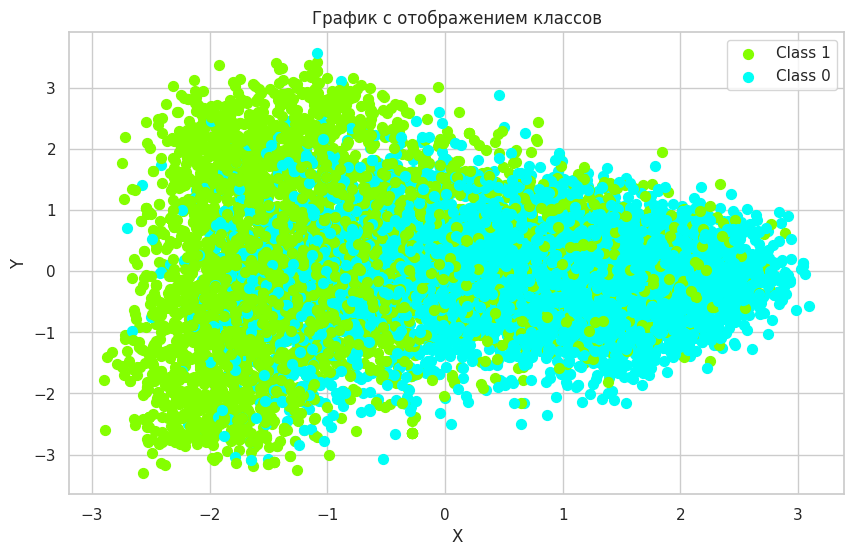

In [55]:
circle_size = 50
df2.rename(columns={"embeddings_vector": "text"}, inplace=True)
df2.dropna(inplace=True)

df2.dropna(inplace=True)
df2 = df2[df2['class_label'] != 2]

df2.loc[:, 'x'] = df2['text'].apply(lambda l: l[0])
df2.loc[:, 'y'] = df2['text'].apply(lambda l: l[1])

sns.set(style='whitegrid')

palette = sns.color_palette("hsv", 3)
colors = {1.0: palette[0], 0.0: palette[1]}

plt.figure(figsize=(10, 6))
for idx, row in df2.iterrows():
    plt.scatter(row['x'], row['y'], s=50, color=colors[row['class_label']], label=f"Class {row['class_label']}" if f"Class {row['class_label']}" not in plt.gca().get_legend_handles_labels()[1] else "")

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('График с отображением классов')
plt.show()

Аналогично для df3

<ipython-input-56-e74804703bca>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.loc[:, 'x'] = df3['text'].apply(lambda l: l[0])
<ipython-input-56-e74804703bca>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.loc[:, 'y'] = df3['text'].apply(lambda l: l[1])


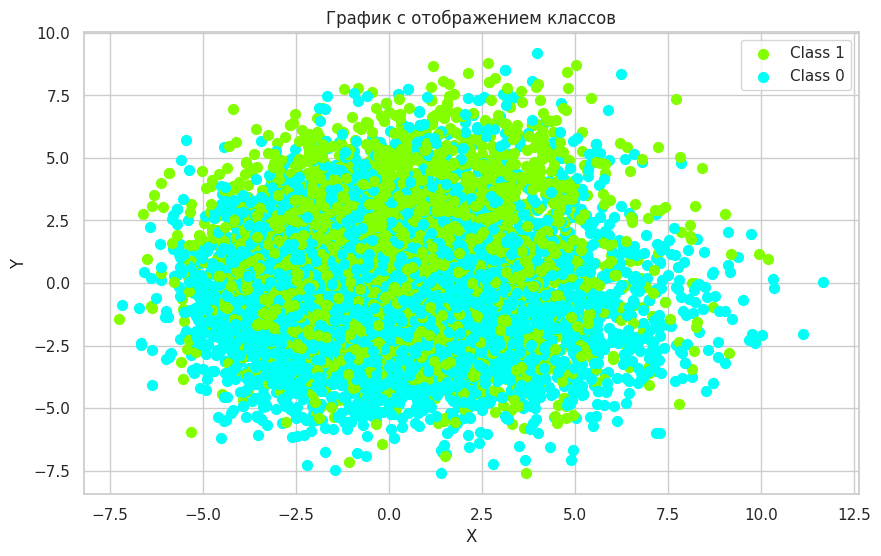

In [56]:
circle_size = 50
df3.rename(columns={"embeddings_vector": "text"}, inplace=True)
df3.dropna(inplace=True)

df3.dropna(inplace=True)
df3 = df3[df3['class_label'] != 2]

df3.loc[:, 'x'] = df3['text'].apply(lambda l: l[0])
df3.loc[:, 'y'] = df3['text'].apply(lambda l: l[1])

sns.set(style='whitegrid')

palette = sns.color_palette("hsv", 3)
colors = {1.0: palette[0], 0.0: palette[1]}

plt.figure(figsize=(10, 6))
for idx, row in df3.iterrows():
    plt.scatter(row['x'], row['y'], s=50, color=colors[row['class_label']], label=f"Class {row['class_label']}" if f"Class {row['class_label']}" not in plt.gca().get_legend_handles_labels()[1] else "")

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('График с отображением классов')
plt.show()

И для df1(BoW)

In [58]:
import numpy as np
from sklearn.decomposition import PCA
pca1 = PCA(n_components=2)
pca1.fit(df1['text'].tolist())
x = pca1.transform(df1['text'].tolist())
df1.insert(1, 'embeddings_vector', x.tolist())
df1.drop(columns=['text'], inplace=True)

Теперь график

<ipython-input-59-ff7d69e56412>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.loc[:, 'x'] = df1['text'].apply(lambda l: l[0])
<ipython-input-59-ff7d69e56412>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.loc[:, 'y'] = df1['text'].apply(lambda l: l[1])


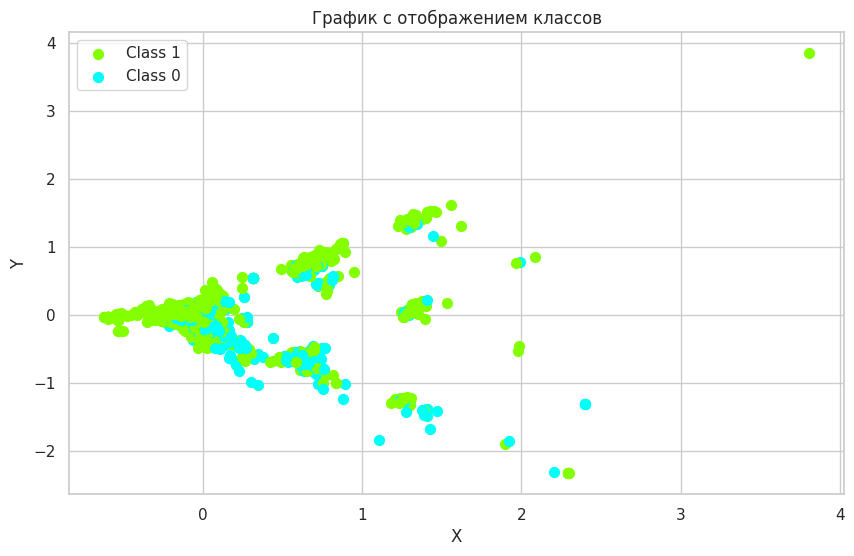

In [59]:
circle_size = 50
df1.rename(columns={"embeddings_vector": "text"}, inplace=True)
df1.dropna(inplace=True)

df1.dropna(inplace=True)
df1 = df1[df1['class_label'] != 2]

df1.loc[:, 'x'] = df1['text'].apply(lambda l: l[0])
df1.loc[:, 'y'] = df1['text'].apply(lambda l: l[1])

sns.set(style='whitegrid')

palette = sns.color_palette("hsv", 3)
colors = {1.0: palette[0], 0.0: palette[1]}

plt.figure(figsize=(10, 6))
for idx, row in df1.iterrows():
    plt.scatter(row['x'], row['y'], s=50, color=colors[row['class_label']], label=f"Class {row['class_label']}" if f"Class {row['class_label']}" not in plt.gca().get_legend_handles_labels()[1] else "")

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('График с отображением классов')
plt.show()

Выводы по графикам делаются наглядно и весьма очевидно Не надо брать рандомные модельки рандомных индусов для создания эмбеддингов))

мяу